In [3]:
import pandas as pd
import numpy as np


df = pd.read_csv('intern_data/data.csv', sep = ',', encoding='cp932', skiprows = [0, 1, 2, 4])
df.head()

,年月日,平均気温(℃),平均気温(℃).1,平均気温(℃).2,降水量の合計(mm),降水量の合計(mm).1,降水量の合計(mm).2,降水量の合計(mm).3,日照時間(時間),日照時間(時間).1,...,最深積雪(cm).3,平均風速(m/s),平均風速(m/s).1,平均風速(m/s).2,平均蒸気圧(hPa),平均蒸気圧(hPa).1,平均蒸気圧(hPa).2,平均雲量(10分比),平均雲量(10分比).1,平均雲量(10分比).2
0,NaN,NaN,品質情報,均質番号,NaN,現象なし情報,品質情報,均質番号,NaN,現象なし情報,...,均質番号,NaN,品質情報,均質番号,NaN,品質情報,均質番号,NaN,品質情報,均質番号
1,2021/8/5,29.1,8,1,0.0,1,8,1,11.7,0,...,1,2.8,8,1,29.0,8,1,5.8,8,1
2,2021/8/6,29.1,8,1,0.0,1,8,1,9.9,0,...,1,2.9,8,1,29.5,8,1,4.0,8,1
3,2021/8/7,27.9,8,1,2.0,0,8,1,1.5,0,...,1,2.5,8,1,32.0,8,1,9.0,8,1
4,2021/8/8,25.9,8,1,90.5,0,8,1,0.1,0,...,1,3.0,8,1,32.3,8,1,10.0,8,1


In [4]:
# 品質情報
# 0	統計しない	観測（統計）対象外の要素
# 1	資料なし、未報告	欠測（統計値が得られない）
# 2	利用不適値	利用に適さない
# 3	疑問値	値が非常に疑わしい
# 4	資料不足値	統計を行うためのもとデータに一定以上の欠落がある
# 5	準正常値	値がやや疑わしい（統計を行うための、もとデータに若干の欠落がある）
# 8	正常値	品質に問題がない（統計を行うための、もとデータに欠落がない）

# 均質番号
# データの値とともにデータの均質性をあらわす番号
# 異なる値だと比較できない

In [5]:
# 列単位で 欠損値NaN(not a number)が入っている個数をカウントする （正確には、isnull()でtrueが返ってくる個数をカウントしている）
df.isnull().sum()

年月日             1
平均気温(℃)         1
平均気温(℃).1       0
平均気温(℃).2       0
降水量の合計(mm)      1
降水量の合計(mm).1    0
降水量の合計(mm).2    0
降水量の合計(mm).3    0
日照時間(時間)        1
日照時間(時間).1      0
日照時間(時間).2      0
日照時間(時間).3      0
最深積雪(cm)        1
最深積雪(cm).1      0
最深積雪(cm).2      0
最深積雪(cm).3      0
平均風速(m/s)       1
平均風速(m/s).1     0
平均風速(m/s).2     0
平均蒸気圧(hPa)      1
平均蒸気圧(hPa).1    0
平均蒸気圧(hPa).2    0
平均雲量(10分比)      1
平均雲量(10分比).1    0
平均雲量(10分比).2    0
dtype: int64

In [6]:
# データでないカラムを抜き出し
cols_quality = df.columns[df.iloc[0] == "品質情報"]
cols_equality = df.columns[df.iloc[0] == "均質番号"]
cols_phenomenon = df.columns[df.iloc[0] == "現象なし情報"]

print(cols_quality)


Index(['平均気温(℃).1', '降水量の合計(mm).2', '日照時間(時間).2', '最深積雪(cm).2', '平均風速(m/s).1',
       '平均蒸気圧(hPa).1', '平均雲量(10分比).1'],
      dtype='object')


In [7]:
# 1行目を削除
df.drop(0, inplace=True)
print(df.head())


        年月日  平均気温(℃) 平均気温(℃).1 平均気温(℃).2  降水量の合計(mm) 降水量の合計(mm).1  \
1  2021/8/5     29.1         8         1         0.0            1   
2  2021/8/6     29.1         8         1         0.0            1   
3  2021/8/7     27.9         8         1         2.0            0   
4  2021/8/8     25.9         8         1        90.5            0   
5  2021/8/9     28.1         8         1         2.0            0   

  降水量の合計(mm).2 降水量の合計(mm).3  日照時間(時間) 日照時間(時間).1  ... 最深積雪(cm).3 平均風速(m/s)  \
1            8            1      11.7          0  ...          1       2.8   
2            8            1       9.9          0  ...          1       2.9   
3            8            1       1.5          0  ...          1       2.5   
4            8            1       0.1          0  ...          1       3.0   
5            8            1       3.9          0  ...          1       6.1   

   平均風速(m/s).1 平均風速(m/s).2 平均蒸気圧(hPa) 平均蒸気圧(hPa).1  平均蒸気圧(hPa).2 平均雲量(10分比)  \
1            8           1       29.0

In [8]:
# 8以外があるか確認
result = (df[cols_quality] != '8').any()
print(result)

# # 1以外が含まれているか確認
result2 = (df[cols_equality] != '1').any()
print(result2)

平均気温(℃).1       False
降水量の合計(mm).2    False
日照時間(時間).2      False
最深積雪(cm).2      False
平均風速(m/s).1      True
平均蒸気圧(hPa).1     True
平均雲量(10分比).1    False
dtype: bool
平均気温(℃).2       False
降水量の合計(mm).3    False
日照時間(時間).3      False
最深積雪(cm).3      False
平均風速(m/s).2     False
平均蒸気圧(hPa).2    False
平均雲量(10分比).2    False
dtype: bool


In [9]:
# '8' でない値が含まれているカラムの名前だけを取得
cols_non_8 = result[result].index.to_numpy()
print(df[cols_non_8])

# '8'でない値が含まれる行をとりだす。'8'でないIndexはTrueとなる。(Index,真偽値)のSeriesを返す
index_non_8 = (df[cols_quality] != '8').any(axis=1)

# '8'でない値が含まれる行だけを取り除く
df = df[~index_non_8]

    平均風速(m/s).1 平均蒸気圧(hPa).1
1             8            8
2             8            8
3             8            8
4             8            8
5             8            8
..          ...          ...
362           8            8
363           8            8
364           8            8
365           8            8
366           8            8

[366 rows x 2 columns]


In [10]:
# "品質情報","均質番号" "現象なし情報"を削除
df.drop(cols_quality, axis=1, inplace=True)
df.drop(cols_equality, axis=1, inplace=True)
df.drop(cols_phenomenon, axis=1, inplace=True)

df.head()

,年月日,平均気温(℃),降水量の合計(mm),日照時間(時間),最深積雪(cm),平均風速(m/s),平均蒸気圧(hPa),平均雲量(10分比)
1,2021/8/5,29.1,0.0,11.7,0.0,2.8,29.0,5.8
2,2021/8/6,29.1,0.0,9.9,0.0,2.9,29.5,4.0
3,2021/8/7,27.9,2.0,1.5,0.0,2.5,32.0,9.0
4,2021/8/8,25.9,90.5,0.1,0.0,3.0,32.3,10.0
5,2021/8/9,28.1,2.0,3.9,0.0,6.1,31.9,6.0


In [11]:
# 日付列を datetime 型に変換
df['年月日'] = pd.to_datetime(df['年月日'], format='%Y/%m/%d')
# datetime列をindexにする
df.set_index('年月日', inplace=True)
df.head()

,平均気温(℃),降水量の合計(mm),日照時間(時間),最深積雪(cm),平均風速(m/s),平均蒸気圧(hPa),平均雲量(10分比)
年月日,,,,,,,
2021-08-05,29.1,0.0,11.7,0.0,2.8,29.0,5.8
2021-08-06,29.1,0.0,9.9,0.0,2.9,29.5,4.0
2021-08-07,27.9,2.0,1.5,0.0,2.5,32.0,9.0
2021-08-08,25.9,90.5,0.1,0.0,3.0,32.3,10.0
2021-08-09,28.1,2.0,3.9,0.0,6.1,31.9,6.0


In [12]:
# 9月のデータを抽出
df_sept = df[df.index.month == 9]
df_sept.head()
print(df.columns)

Index(['平均気温(℃)', '降水量の合計(mm)', '日照時間(時間)', '最深積雪(cm)', '平均風速(m/s)',
       '平均蒸気圧(hPa)', '平均雲量(10分比)'],
      dtype='object')


array([[<Axes: title={'center': '平均気温(℃)'}>,
        <Axes: title={'center': '降水量の合計(mm)'}>,
        <Axes: title={'center': '日照時間(時間)'}>],
       [<Axes: title={'center': '最深積雪(cm)'}>,
        <Axes: title={'center': '平均風速(m/s)'}>,
        <Axes: title={'center': '平均蒸気圧(hPa)'}>],
       [<Axes: title={'center': '平均雲量(10分比)'}>, <Axes: >, <Axes: >]],
      dtype=object)

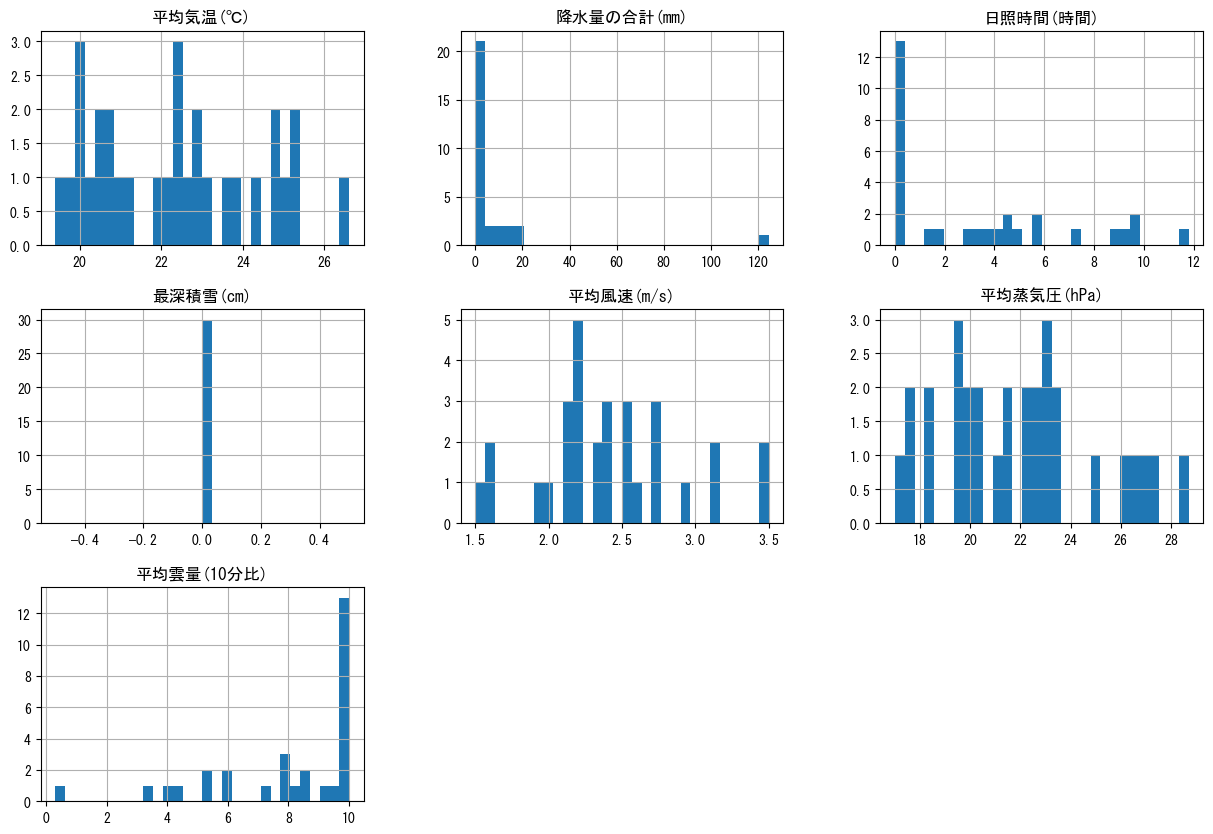

In [13]:
import matplotlib.pyplot as plt
# 日本語が表示できるMSゴシックにフォントを変更
plt.rcParams['font.family'] = "MS Gothic"

df_sept.hist(bins=30, figsize=(15, 10))

array([[<Axes: title={'center': '平均気温(℃)'}>,
        <Axes: title={'center': '降水量の合計(mm)'}>,
        <Axes: title={'center': '日照時間(時間)'}>],
       [<Axes: title={'center': '最深積雪(cm)'}>,
        <Axes: title={'center': '平均風速(m/s)'}>,
        <Axes: title={'center': '平均蒸気圧(hPa)'}>],
       [<Axes: title={'center': '平均雲量(10分比)'}>, <Axes: >, <Axes: >]],
      dtype=object)

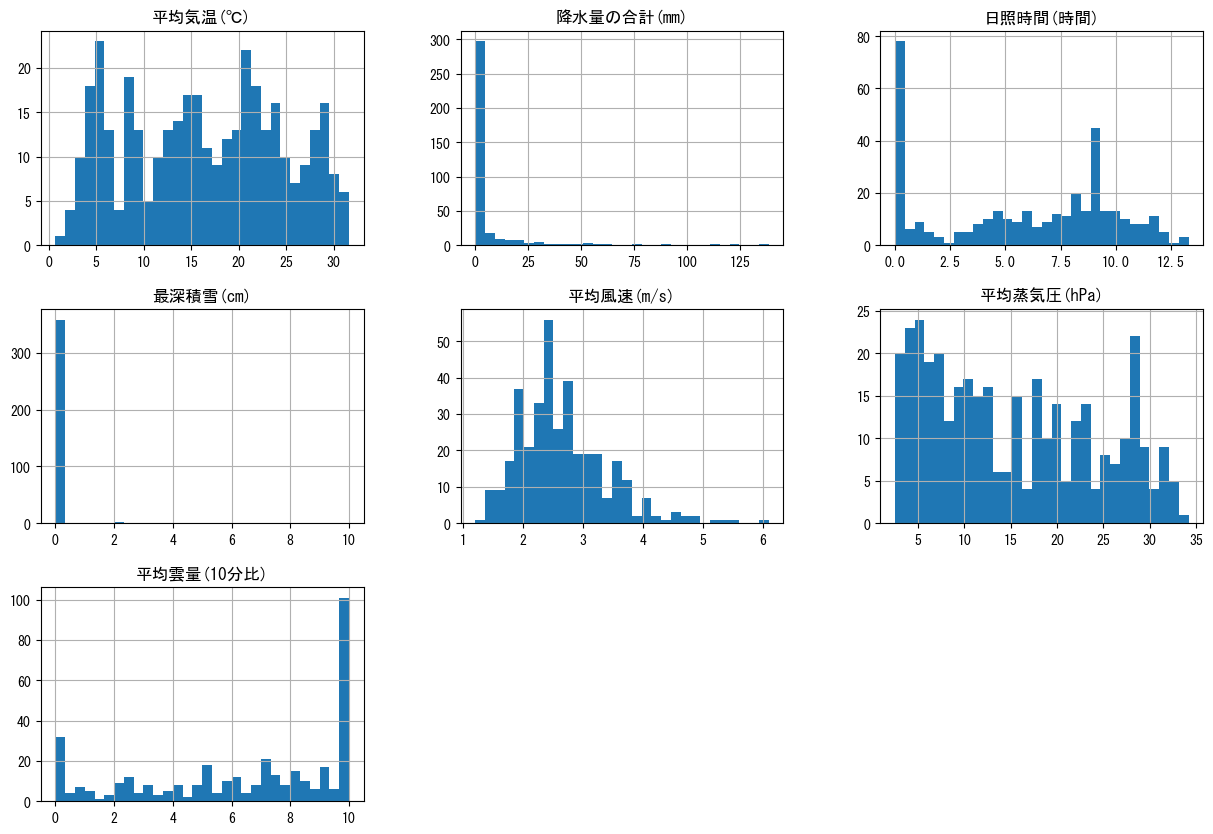

In [14]:
df.hist(bins=30, figsize=(15, 10))

<Axes: >

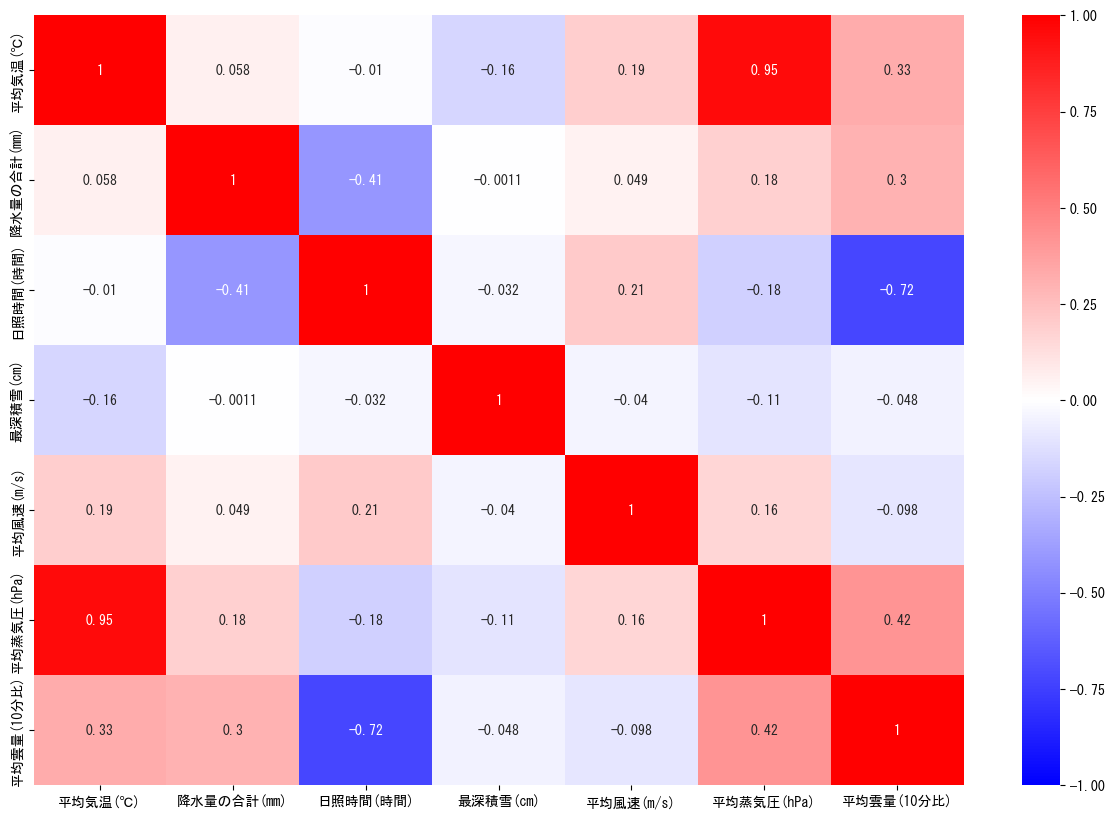

In [15]:
# 説明変数同士の層間をチェック
# 相関係数の行列を作成
heat = df.corr()

plt.figure(figsize=(15,10))

import seaborn as sns
# 表のスタイルを指定しながらヒートマップを表示
sns.heatmap(heat, vmin=-1,vmax=1.0,center=0,annot=True, cmap="bwr")

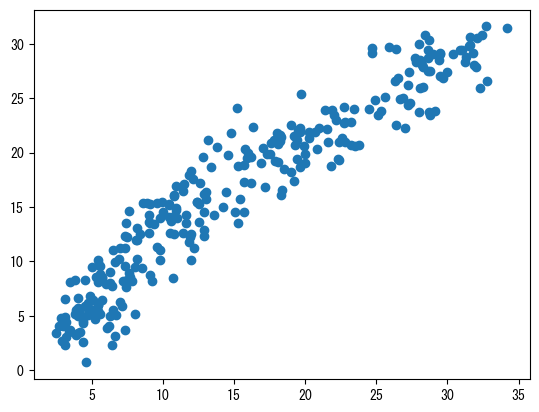

In [16]:
from sklearn.model_selection import train_test_split
# month列の追加
df['month'] = list(pd.Series(df.index).apply(lambda x: x.month))
# 学習用モデル、テスト用モデルの作成(ランダムに分割、listで返る)
train, test = train_test_split(df, test_size=0.2)

import matplotlib.pyplot as plt
# 説明変数　([[ ]]でDataFrame型にする)
#
x_train = train[['平均蒸気圧(hPa)']]
x_test = test[['平均蒸気圧(hPa)']]

# 目的変数
y_train = train[['平均気温(℃)']]
y_test = test[['平均気温(℃)']]

plt.scatter(x_train, y_train)
plt.show()

回帰直線の切片 3.13588047829181
回帰係数 0.8691126067997912
回帰直線 y =  0.8691126067997912 x +  3.13588047829181
決定係数 0.9374558083748586


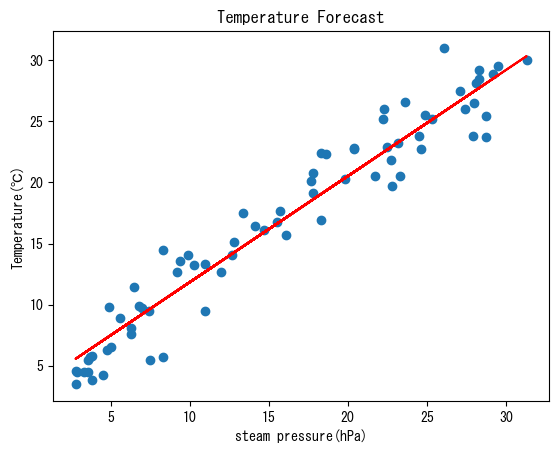

In [17]:
from sklearn.linear_model import LinearRegression as LR

model = LR()

model.fit(x_train, y_train)

# 回帰直線の切片
print('回帰直線の切片', model.intercept_[0])
# 回帰係数
print('回帰係数', model.coef_[0][0])
# 回帰直線の式
print('回帰直線', 'y = ', model.coef_[0][0], 'x + ', model.intercept_[0])

# 回帰直線と散布図を表示
plt.scatter(x_test, y_test)
plt.plot(x_test, model.predict(x_test), color='red')
plt.xlabel('steam pressure(hPa)')
plt.ylabel('Temperature(℃)')
plt.title('Temperature Forecast')

# 決定係数を用いた評価関数(自動でy_predictsを計算してくれる)
print('決定係数', model.score(x_test, y_test))


In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# パイプラインの作成(fitを実行すると、前のメソッドからfit1(学習)→transform1(推論)→fit2→ransform2...
# のように学習と推論が行われていく)
# 加えてpredictやscoreを実行すると前の学習をもとに推論のみを実行するため便利
pipeline = Pipeline([
    # xを標準化
    ('pt', StandardScaler()),
    # 単回帰処理
    ('lr', LR())
])
pipeline.fit(x_train, y_train)

print('決定係数', pipeline.score(x_test, y_test))

決定係数 0.9374558083748586


In [19]:
# 説明変数
exp_vars = [ '降水量の合計(mm)', '日照時間(時間)', '最深積雪(cm)', '平均風速(m/s)','平均蒸気圧(hPa)', '平均雲量(10分比)', 'month']
x_train3 = train[exp_vars]
x_test3 = test[exp_vars]

# 目的変数
tar_var = ['平均気温(℃)']
y_train3 = train[tar_var]
y_test3 = test[tar_var]

# パイプラインを用いたモデルの学習
pipeline.fit(x_train3, y_train3)

# 決定係数を用いた評価関数
print('決定係数', pipeline.score(x_test3, y_test3))
# 自由度調整済み決定係数を用いた評価関数
p = x_test3.shape[1]
n = len(x_test3)
adj_r2 = 1 - (1 - pipeline.score(x_test3, y_test3)) * (n - 1) / (n - p - 1)
print('自由度調整済み決定係数', adj_r2)
# 平均二乗誤差を用いた評価関数
from sklearn.metrics import mean_squared_error
print('平均二乗誤差',mean_squared_error(y_test3, pipeline.predict(x_test3)))

決定係数 0.9546979552186063
自由度調整済み決定係数 0.9498192734729178
平均二乗誤差 3.0469039983452872


In [20]:
# 必ず入れる説明変数
fixed_exp_vars = ['平均蒸気圧(hPa)', '平均雲量(10分比)']
# 選択する説明変数
select_exp_vars = ['降水量の合計(mm)', '日照時間(時間)', '最深積雪(cm)', '平均風速(m/s)', 'month']

# 自由度調整済み決定係数の際大値
max_adj_r2 = 0
# 平均二乗誤差の最小値
min_mse = 1000000000
# 自由度調整済み決定係数により選択された説明変数
r2_exp_vars = []
# 平均二乗誤差により選択された説明変数
mse_exp_vars = []
k =0
# 選択する説明変数の選び方は2**(select_n  ) 通り
select_n = len(select_exp_vars)
for i in range(2**select_n):
    # 説明変数のリストを用意
    exp_vars = fixed_exp_vars.copy()
# それぞれのビットを選択のフラグとして、シフト演算を行うことで取り出す
    for j in range(select_n):
        if (i >> j) & 1:
            exp_vars.append(select_exp_vars[j])

    # 説明変数
    x_train4 = train[exp_vars]
    x_test4 = test[exp_vars]

    # 目的変数
    tar_var = ['平均気温(℃)']
    y_train4 = train[tar_var]
    y_test4 = test[tar_var]

    # パイプラインを用いたモデルの学習
    pipeline.fit(x_train4, y_train4)
    # 自由度調整済み決定係数を用いた評価関数
    p = x_test4.shape[1]
    n = len(x_test4)
    adj_r2 = 1 - (1 - pipeline.score(x_test4, y_test4)) * (n - 1) / (n - p - 1)
    # 自由度調整済み決定係数の最大値を更新
    if adj_r2 > max_adj_r2:
        max_adj_r2 = adj_r2
        r2_exp_vars = exp_vars.copy()

    # 平均二乗誤差を用いた評価関数
    mse = mean_squared_error(y_test4, pipeline.predict(x_test4))
    # 平均二乗誤差の最小値を更新
    if mse < min_mse:
        min_mse = mse
        mse_exp_vars = exp_vars.copy()
print('自由度調整済み決定係数の最大値', max_adj_r2)
print('自由度調整済み決定係数で選択された説明変数', r2_exp_vars)
print('平均二乗誤差の最小値', min_mse)
print('平均二乗誤差で選択された説明変数', mse_exp_vars)


自由度調整済み決定係数の最大値 0.9575410149001294
自由度調整済み決定係数で選択された説明変数 ['平均蒸気圧(hPa)', '平均雲量(10分比)', '降水量の合計(mm)', '日照時間(時間)']
平均二乗誤差の最小値 2.682583342026092
平均二乗誤差で選択された説明変数 ['平均蒸気圧(hPa)', '平均雲量(10分比)', '降水量の合計(mm)', '日照時間(時間)', '平均風速(m/s)']


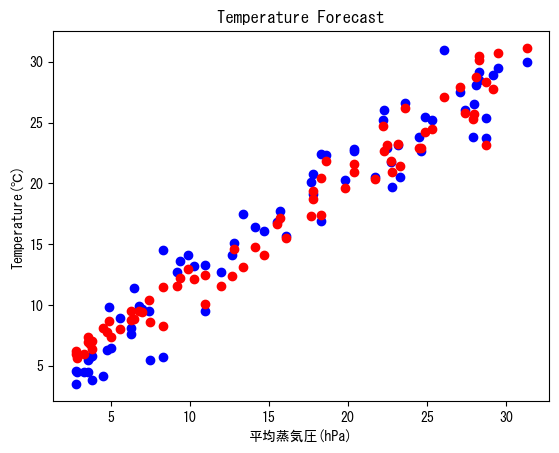

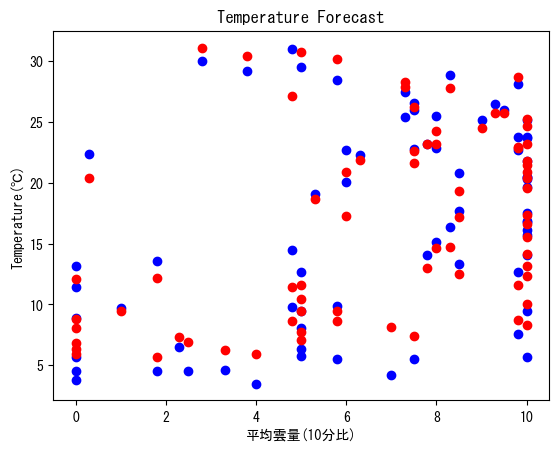

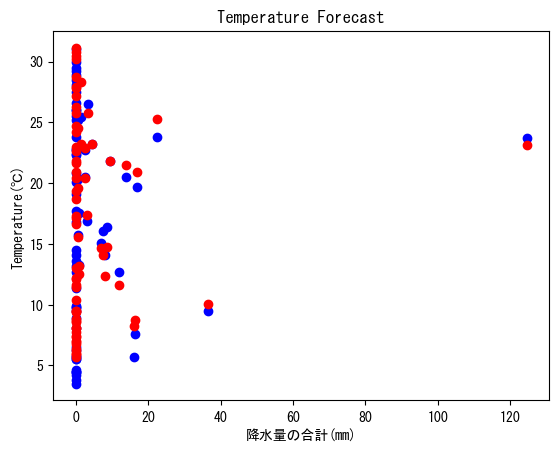

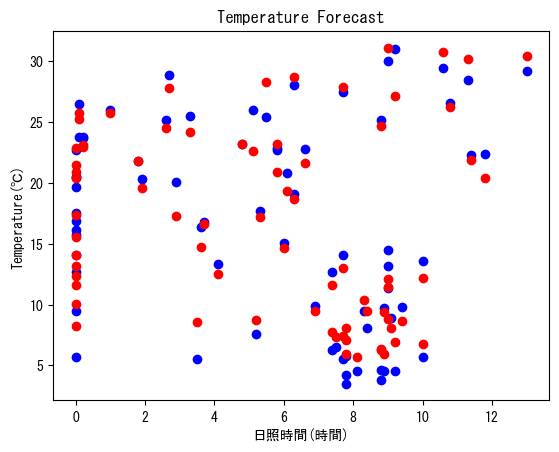

In [21]:
# 説明変数
exp_vars = r2_exp_vars
x_train4 = train[exp_vars]
x_test4 = test[exp_vars]

# 目的変数
tar_var = ['平均気温(℃)']
y_train4 = train[tar_var]
y_test4 = test[tar_var]

# パイプラインを用いたモデルの学習
pipeline.fit(x_train4, y_train4)
y_predict = pipeline.predict(x_test4)

for x_name in r2_exp_vars:
# 予測と実際の散布図を表示
    plt.scatter(x_test4[x_name], y_test4, color = 'blue')
    plt.scatter(x_test4[x_name], y_predict, color='red')
    plt.xlabel(x_name)
    plt.ylabel('Temperature(℃)')
    plt.title('Temperature Forecast')
    plt.show()

In [25]:
# 2変数重回帰の3次元プロット
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import mplcursors
# matplotlibで可視化
fig = plt.figure(figsize = (8, 8))
ax= fig.add_subplot(111, projection='3d')
# インタラクティブなカーソルを追加
mplcursors.cursor(ax)
ax.scatter(x_train4.iloc[:,0], x_train4.iloc[:,1], y_train4, s = 1, c = "blue")
ax.plot_surface(x_test4.iloc[:,0], x_test4.iloc[:,0], y_test, alpha=0.3)
plt.show()
# x = [1, 2, 3, 4, 5]
# y = [2, 4, 6, 8, 10]
# z = np.linspace(0, 100, 11)
# Y, Z = np.meshgrid(y, z)
# X = np.array([x] * Y.shape[0])

# fig = plt.figure()
# ax = Axes3D(fig)
# ax.set_xlabel("X")
# ax.set_ylabel("Y")
# ax.set_zlabel("Z")


ModuleNotFoundError: No module named 'mplcursors'